<a href="https://colab.research.google.com/github/c-susan/Group-Project/blob/main/Group_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Loading Packages**

In [50]:
# Commands to install some of the libraries in-case if they are not installed
# Any other library that needs to be installed just use: !pip install <library name>
# !pip install seaborn
# !pip install missingno
# !pip install xgboost
#!pip install catboost
# !pip install regex
# !pip install sklearn
# !pip install pandas
# !pip install numpy
# !pip install imblearn
# !pip install lightgbm

In [51]:
import pandas as pd
import numpy as np   # linear algebra
import matplotlib.pyplot as plt  #graphs and plots
import seaborn as sns   #data visualizations
import csv # Some extra functionalities for csv  files - reading it as a dictionary
from lightgbm import LGBMClassifier #sklearn is for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction

from sklearn.model_selection import train_test_split, cross_validate   #break up dataset into train and test sets

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# importing python library for working with missing data
import missingno as msno
# To install missingno use: !pip install missingno
import re    # This library is used to perform regex pattern matching

# import various functions from sklearn
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, classification_report, make_scorer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

In [52]:
from sklearn.model_selection import KFold,cross_val_score, RepeatedStratifiedKFold,StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.compose import make_column_transformer
from imblearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score,\
                            #precision_score, recall_score, roc_auc_score,\
                            #plot_confusion_matrix, classification_report, plot_roc_curve, f1_score

import plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings("ignore")

# **Data Cleaning**

In [136]:
diabetes = pd.read_csv('diabetic_data.csv')
diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


## **1. Dropping Unnecessary Columns**

In [137]:
# Dropping the 'encounter_id', 'patient_nbr', 'admission_type_id', 'discharge_disposition_id',
## and 'admission_source_id' columns
diabetes.drop(['encounter_id',
               'patient_nbr',
               'admission_type_id',
               'discharge_disposition_id',
               'admission_source_id'], axis = 1, inplace = True)

## **2. Checking for Duplicates in Data**

In [138]:
diabetes.duplicated().sum()

0

## **3. Checking for Missing Values**

In [139]:
# Some of the missing values are marked with '?'.
## The script below changes the '?' values to NAN values to explore the amount of missing data in each column.
diabetes = diabetes.replace('?', np.nan)

In [140]:
# Checking for amount of null/missing values.
def missing (diabetes):
    missing_number = diabetes.isnull().sum().sort_values(ascending=False)
    missing_percent = ((diabetes.isnull().sum()/diabetes.isnull().count())*100).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent %'])
    return missing_values

missing(diabetes)

,Missing_Number,Missing_Percent %
weight,98569,96.858479
max_glu_serum,96420,94.746772
A1Cresult,84748,83.277322
medical_specialty,49949,49.082208
payer_code,40256,39.557416
race,2273,2.233555
diag_3,1423,1.398306
diag_2,358,0.351787
diag_1,21,0.020636
glimepiride-pioglitazone,0,0.000000


In [141]:
# According to the variable table/data dictionary, the 'A1Cresult' and 'max_glu_serum' do not have missing values.
# The 'nan' values in two columns indicate that no measurements were taken.
# The script below replaces the 'nan' values of the two columns with 'no measured'.
diabetes[['A1Cresult', 'max_glu_serum']] = diabetes[['A1Cresult', 'max_glu_serum']].fillna('not measured')

<Axes: >

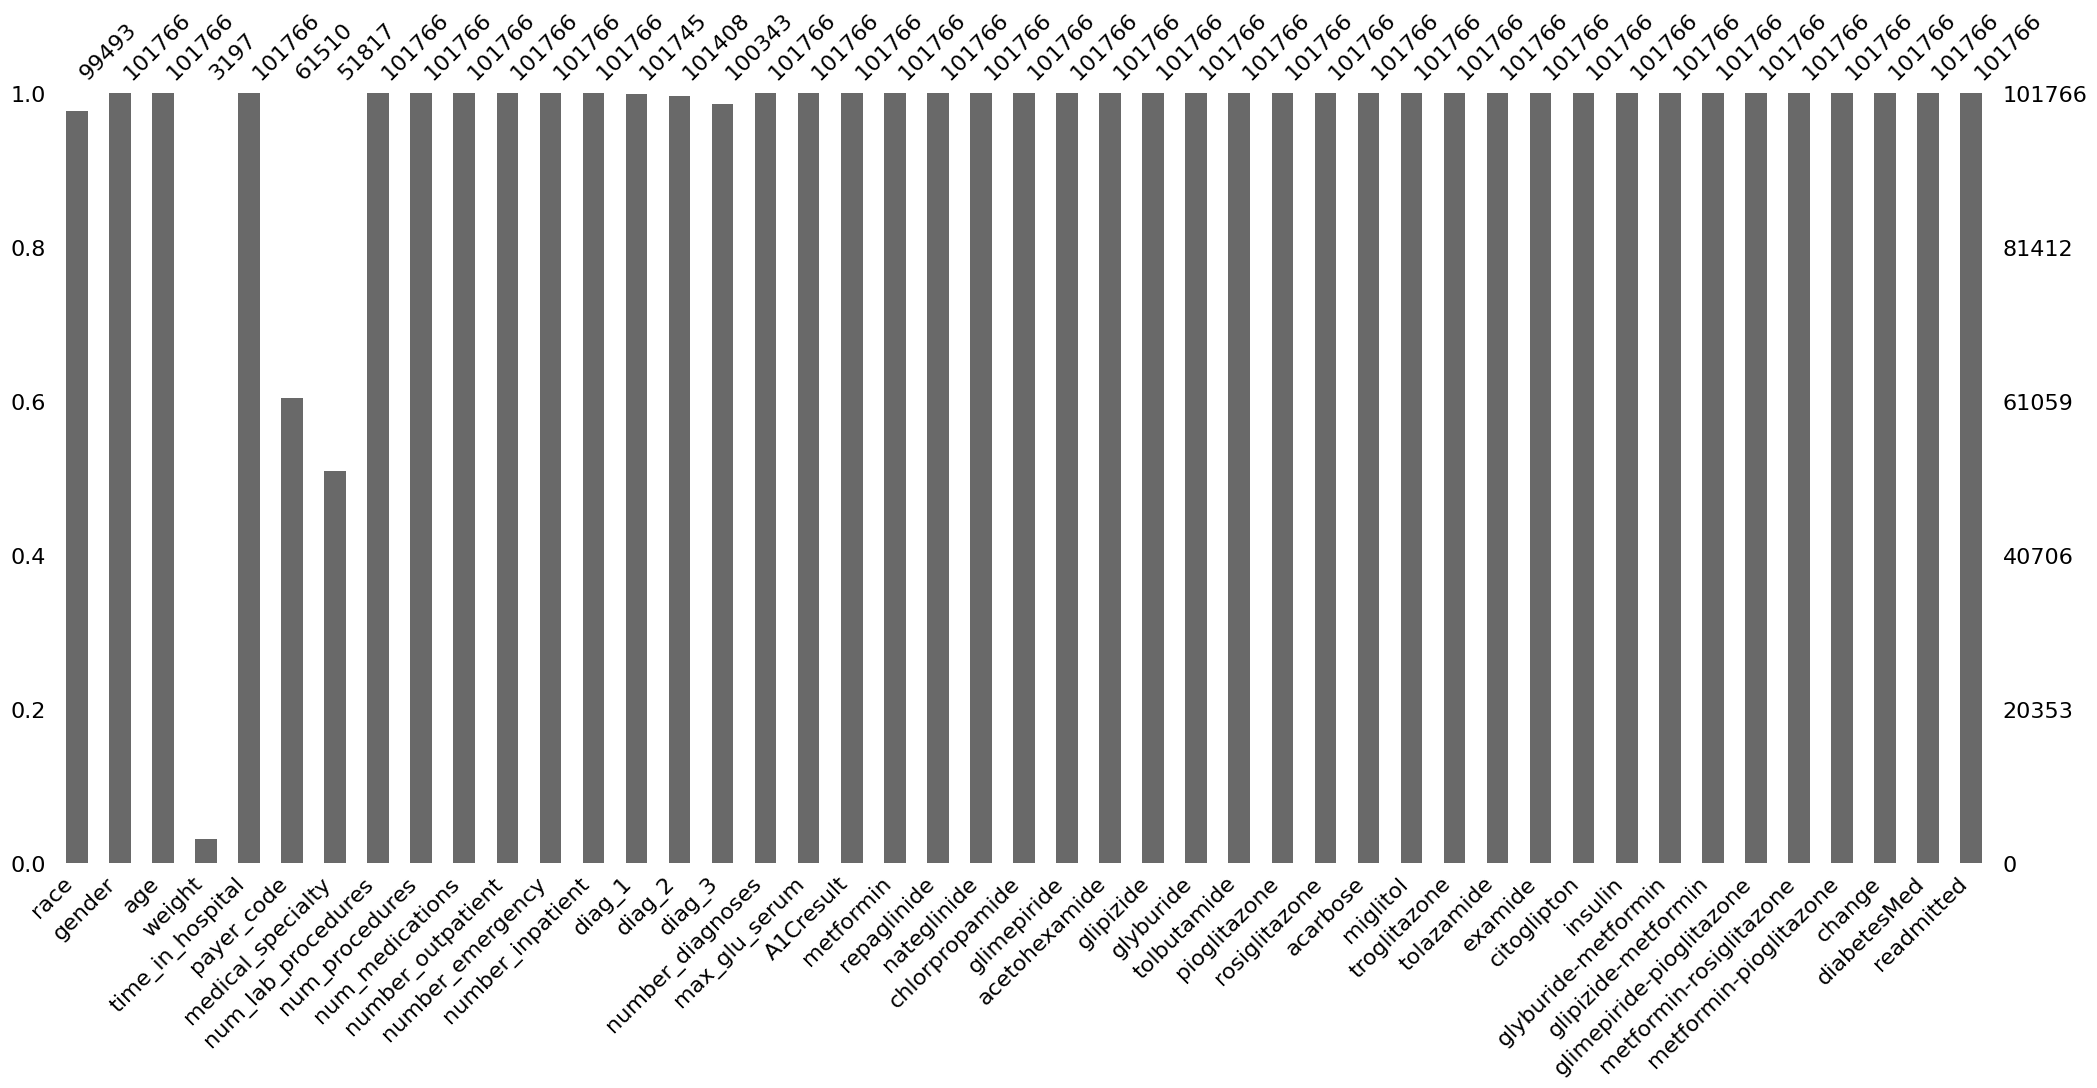

In [142]:
# Visualizing the missing data
msno.bar(diabetes)

In [143]:
# Dropping the 'weight' column as it has large percentage (%97) of missing values
diabetes.drop(['weight','diag_1','diag_2','diag_3'], axis = 1, inplace = True)

In [144]:
# Because the columns with missing values are all categorical values with object datatypes,
# I decided to replace the null values with 'N/A'.
diabetes = diabetes.fillna('N/A')

<Axes: >

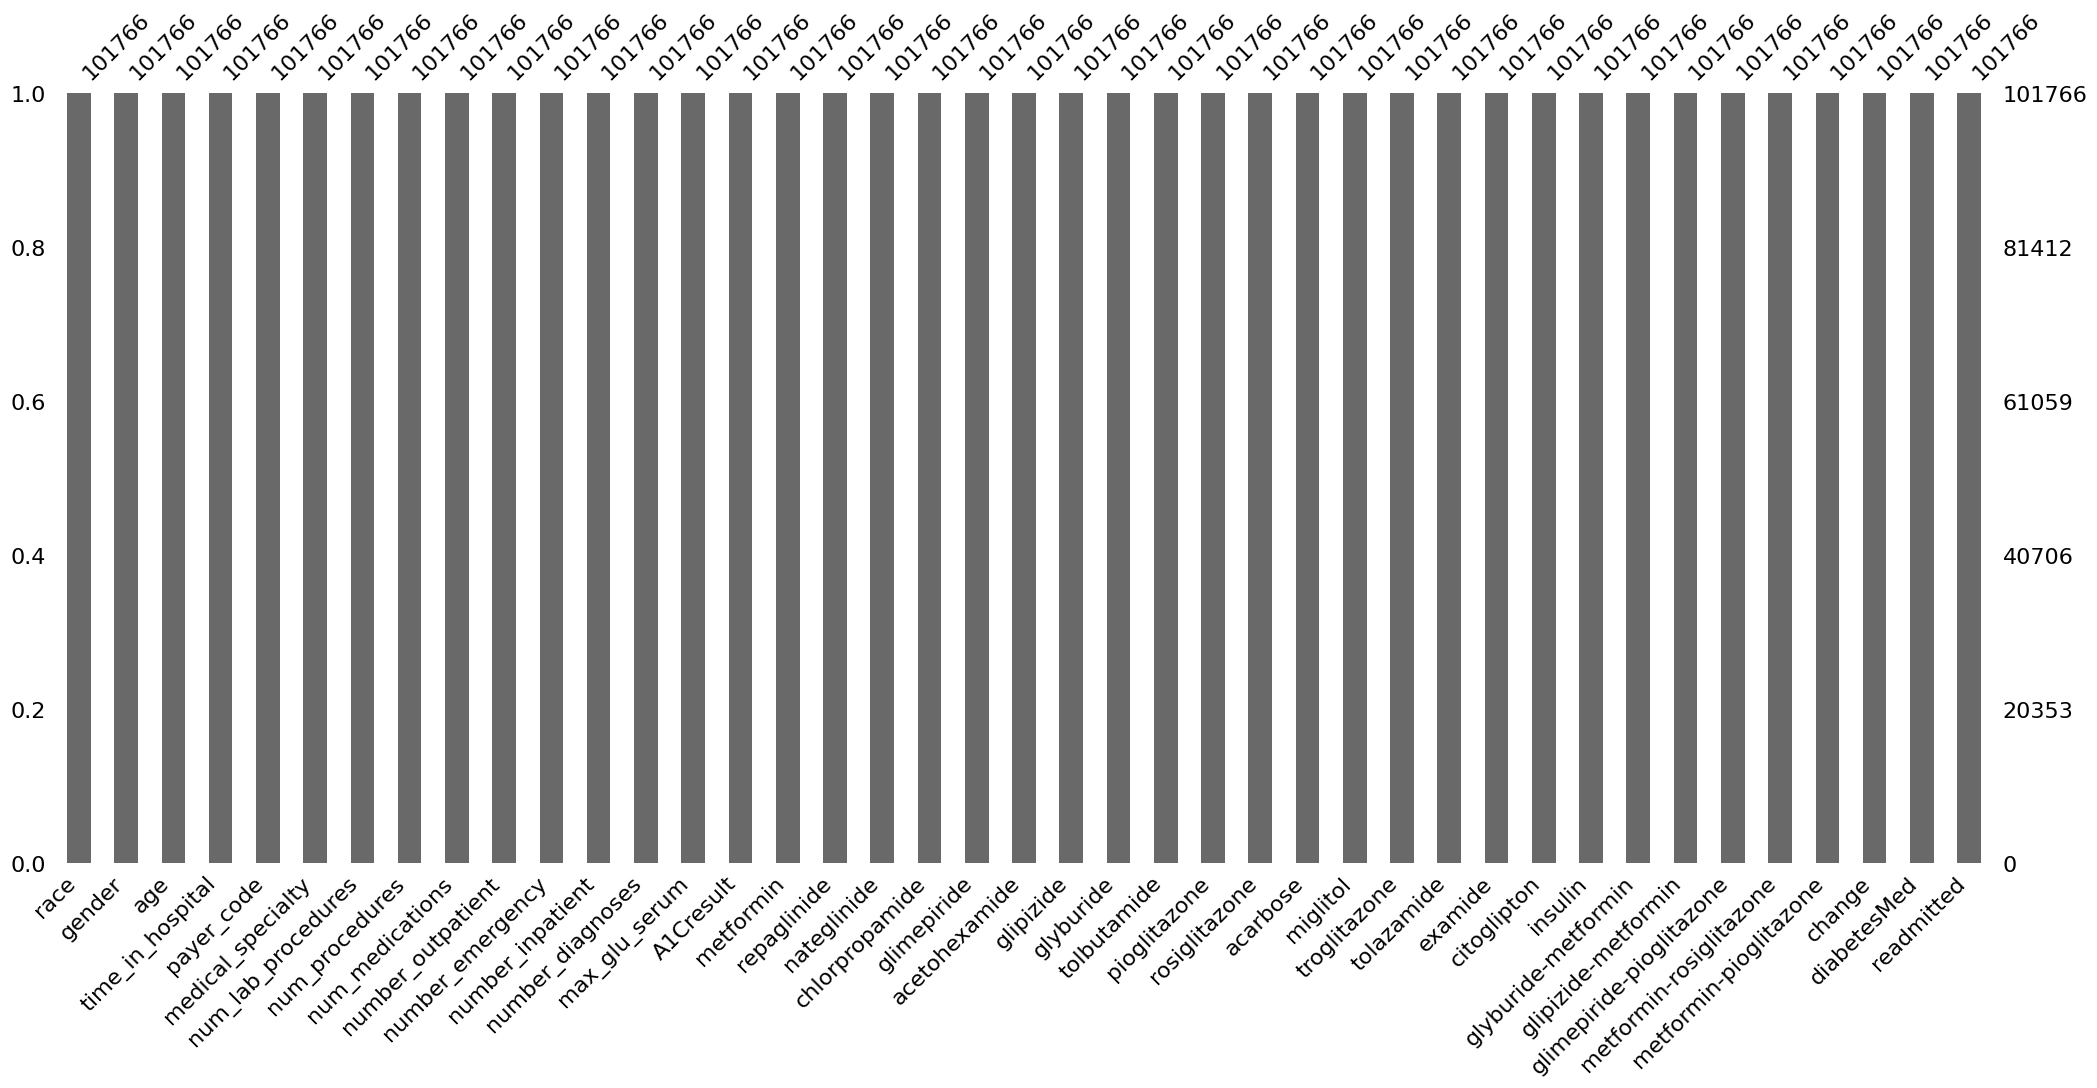

In [145]:
msno.bar(diabetes)

# **Metrics of Importance**

In [146]:
numerical= ['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient',
           'number_emergency','number_inpatient','number_diagnoses']

categorical = ['race','gender','age','insulin','change','diabetesMed']

In [147]:
## 0 = not readmitted and readmitted after 30 days
## 1 = readmitted within 30 days
readmitted = {'NO':0, '>30':0, '<30':1}
diabetes['readmitted'] = diabetes['readmitted'].map(readmitted)

In [148]:
from sklearn.metrics import mutual_info_score
def cat_mut_inf(series):
    return mutual_info_score(series, diabetes['readmitted'])

diabetes_cat = diabetes[categorical].apply(cat_mut_inf)
diabetes_cat = diabetes_cat.sort_values(ascending=False).to_frame(name='mutual_info_score')
diabetes_cat

,mutual_info_score
insulin,0.000910
age,0.000625
diabetesMed,0.000379
change,0.000190
race,0.000136
gender,0.000008


### **Correlation Matrix**

In [66]:
diabetes[numerical].corr()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
time_in_hospital,1.000000,0.318450,0.191472,0.466135,-0.008916,-0.009681,0.073623,0.220186
num_lab_procedures,0.318450,1.000000,0.058066,0.268161,-0.007602,-0.002279,0.039231,0.152773
num_procedures,0.191472,0.058066,1.000000,0.385767,-0.024819,-0.038179,-0.066236,0.073734
num_medications,0.466135,0.268161,0.385767,1.000000,0.045197,0.013180,0.064194,0.261526
number_outpatient,-0.008916,-0.007602,-0.024819,0.045197,1.000000,0.091459,0.107338,0.094152
number_emergency,-0.009681,-0.002279,-0.038179,0.013180,0.091459,1.000000,0.266559,0.055539
number_inpatient,0.073623,0.039231,-0.066236,0.064194,0.107338,0.266559,1.000000,0.104710
number_diagnoses,0.220186,0.152773,0.073734,0.261526,0.094152,0.055539,0.104710,1.000000


In [67]:
diabetes.groupby('readmitted')[numerical].mean()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
readmitted,,,,,,,,
0,4.349224,42.953644,1.347123,15.911137,0.360871,0.177803,0.561648,7.388667
1,4.768249,44.226028,1.280884,16.903143,0.436911,0.357313,1.224003,7.692789


In [68]:
diabetes[['time_in_hospital','num_medications','number_diagnoses', 'readmitted']].corr()

,time_in_hospital,num_medications,number_diagnoses,readmitted
time_in_hospital,1.000000,0.466135,0.220186,0.044199
num_medications,0.466135,1.000000,0.261526,0.038432
number_diagnoses,0.220186,0.261526,1.000000,0.049524
readmitted,0.044199,0.038432,0.049524,1.000000


### **Scatterplots**

**Time in Hospital & Readmitted**

In [69]:
fig = px.scatter(diabetes, x='time_in_hospital', y='readmitted', title='Time in Hospital & Readmitted',color='readmitted', hover_data = diabetes[['readmitted']])
fig.show()

**Num Medications & Readmitted**

In [70]:
fig = px.scatter(diabetes, x='num_medications', y='readmitted', title='Number of Medications & Readmitted',color='readmitted', hover_data = diabetes[['readmitted']])
fig.show()

**Num Diagnoses & Readmitted**

In [71]:
fig = px.scatter(diabetes, x='number_diagnoses', y='readmitted', title='Number of Diagnoses & Readmitted',color='readmitted', hover_data = diabetes[['readmitted']])
fig.show()

# **Converting Categorical Features into Numeric Features**

In [ ]:
# Using get_dummies from the pandas library to convert categorical feature to numeric
diabetes = pd.get_dummies(diabetes, drop_first = False)

# **Breaking the data up into Train & Test**

In [ ]:
train_df, valid_df, test_df = np.split(diabetes.sample(frac=1, random_state=42),
                                       [int(.7*len(diabetes)), int(0.85*len(diabetes))])
train_df = train_df.reset_index(drop = True)
valid_df = valid_df.reset_index(drop = True)
test_df = test_df.reset_index(drop = True)

In [ ]:
diabetes.readmitted.value_counts()

readmitted
0    90409
1    11357
Name: count, dtype: int64

In [ ]:
train_df.readmitted.value_counts()

readmitted
0    63275
1     7961
Name: count, dtype: int64

In [ ]:
valid_df.readmitted.value_counts()

readmitted
0    13520
1     1745
Name: count, dtype: int64

In [ ]:
test_df.readmitted.value_counts()

readmitted
0    13614
1     1651
Name: count, dtype: int64

## **Treating the Imbalance in the Data**

In [ ]:
def calc_prevalence(y_actual):

    '''
    This function is to understand the ratio/distribution of the classes that we are going to predict for.

    Params:
    1. y_actual: The target feature

    Return:
    1. (sum(y_actual)/len(y_actual)): The ratio of the postive class in the comlpete data.
    '''

    return (sum(y_actual)/len(y_actual))

In [ ]:
# split the training data into positive and negative
rows_pos = train_df.readmitted == 1
df_train_pos = train_df.loc[rows_pos]
df_train_neg = train_df.loc[~rows_pos]

# merge the balanced data
diabetes_df_balanced = pd.concat([df_train_pos, df_train_neg.sample(n = len(df_train_pos), random_state = 111)],axis = 0)

# shuffle the order of training samples
diabetes_df_balanced = diabetes_df_balanced.sample(n = len(diabetes_df_balanced), random_state = 42).reset_index(drop = True)

print('Train balanced prevalence(n = %d):%.3f'%(len(diabetes_df_balanced), \
                                                calc_prevalence(diabetes_df_balanced.readmitted.values)))

Train balanced prevalence(n = 15922):0.500


In [ ]:
diabetes_df_balanced.readmitted.value_counts()

readmitted
1    7961
0    7961
Name: count, dtype: int64

In [ ]:
X_train = diabetes_df_balanced.drop('readmitted',axis=1)

y_train = diabetes_df_balanced['readmitted']

X_valid = valid_df.drop('readmitted',axis=1)

y_valid = valid_df['readmitted']

X_test = test_df.drop('readmitted',axis=1)

y_test = test_df['readmitted']

In [ ]:
scaler=StandardScaler()
X_train[['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses']] = pd.DataFrame(scaler.fit_transform(X_train[['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses']]),columns=['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses'])
X_valid[['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses']] = pd.DataFrame(scaler.transform(X_valid[['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses']]),columns=['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses'])
X_test[['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses']] = pd.DataFrame(scaler.transform(X_test[['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses']]),columns=['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses'])

# **Creating and Understanding Models**

In [ ]:
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh = 0.5):

    '''
    This function calculates all the metrics to asses the machine learning models.

    Params:
    1. y_actual: The actual values for the target variable.
    2. y_pred: The predicted values for the target variable.
    3. thresh: The threshold for the probability to be considered as a positive class. Default value 0.5

    Return:
    1. AUC
    2. Accuracy
    3. Recall
    4. Precision
    5. Specificity
    '''

    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity

## **Linear Regression**

In [ ]:
lnr = LinearRegression()
lnr.fit(X_train, y_train)


y_valid_preds = lnr.predict(X_valid)

In [ ]:
y_valid_preds

array([0.49449158, 0.74195862, 0.68196106, ..., 0.41818237, 0.62098694,
       0.51142883])

## **Logistic Regression**

In [ ]:
lr=LogisticRegression(random_state = 42, solver = 'newton-cg', max_iter = 200)
lr.fit(X_train, y_train)

y_valid_preds = lr.predict_proba(X_valid)[:,1]

print('Metrics for Validation data:')

lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,y_valid_preds, 0.5)

Metrics for Validation data:
AUC:0.631
accuracy:0.643
recall:0.531
precision:0.167
specificity:0.657
prevalence:0.114
 


### Explaining Results

1. **AUC (area under the curve)**: AUC measures the performace of the model at distinguishing between the positive and negative classes. An AUC closer to 1 indicates better performance. The AUC of 0.631 indicates that the model can moderately distinguish between the negative and positive classes.

2. **Accuracy**: Accuracy is the ratio of correctly predicted observation to the total observations. The accuracy of 0.643 means that 64.3% of the model's predictions are close to the true value.

3. **Recall (Sensitivity)**: Recall is the ratio of correctly predicted positive observations to the total predicted positive observations. A recall of 0.532 means the model correctly predicted 53.2% of the positive observations. The model can moderately correctly predict the total predicted positive cases as positive, but misses a significant portion of the positive cases.

4. **Precision**: Precision is the ratio between the correct positive predictions and the total positive predictions. The precision of 0.167 means that the model is not good at making the correct positive predictions. The model has a low level of precision.

5. **Specificity**: Specificity shows the proportion of negative cases correctly predicted by the model. The specificity of 0.657 means that the model can correctly identify 65.7% of the negative cases.

6. **Prevalence**: Precision indicates the proportion of positive cases in the dataset. A precision of 0.114 indicates that there were 11.4% of positive cases in the validation dataset.


**Summary**

The model can moderately distinguish between the negative and positive classes, with a moderate level of accuracy, recall, and specificity. There is a low level of precision. The model can be improved to increase its overall performance.

## **KNN Model**

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train, y_train)

knn_preds = knn.predict_proba(X_valid)[:,1]

lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,knn_preds, 0.5)

AUC:0.612
accuracy:0.575
recall:0.582
precision:0.150
specificity:0.530
prevalence:0.114
 


## Stochastic Gradient Descent Model

In [ ]:
sgdc=SGDClassifier(loss = 'log_loss',alpha = 0.1,random_state = 42)
sgdc.fit(X_train, y_train)

sgd_preds = sgdc.predict_proba(X_valid)[:,1]

print('Stochastic Gradient Descent')
print('Validation:')
sgdc_valid_auc, sgdc_valid_accuracy, sgdc_valid_recall, \
                sgdc_valid_precision, sgdc_valid_specificity = print_report(y_valid,sgd_preds, 0.5)

Stochastic Gradient Descent
Validation:
AUC:0.631
accuracy:0.698
recall:0.438
precision:0.174
specificity:0.732
prevalence:0.114
 


## **Decision Tree**

In [ ]:
dc_clf = DecisionTreeClassifier(random_state=42, max_depth = 10)
dc_clf.fit(X_train, y_train)

dc_preds_proba = dc_clf.predict_proba(X_valid)[:,1]
dc_preds = dc_clf.predict(X_valid)

lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,dc_preds_proba, 0.5)

AUC:0.597
accuracy:0.568
recall:0.582
precision:0.148
specificity:0.557
prevalence:0.114
 


### Explaining Results
* **AUC**: The AUC of 0.597 indicates that the model can slightly distinguish between the negative and positive classes.
* **Accuracy**: The accuracy of 0.568 means that the model can correctly predict the output 56.8% of the time.
* **Recall**: The recall of 0.582 indicates that out of all actual positive cases, the model can correctly identify 58.2% of them.
* **Precision**: The low precision of 0.148 indicates that the model not good at making the correct positive predictions.
* **Specificity**: The specificity of 0.557 means that the model can correctly identify 55.7% of the negative cases.
* **Prevalence**: A precision of 0.114 indicates that there were 11.4% of positive cases in the validation dataset.

**Summary**
The model can slightly distinguish between the negative and positive classes, with a moderate levels of accuracy, recall, and specificity. The model has a low precision.


## **Random Forest**

In [ ]:
rf_clf = RandomForestClassifier(random_state=111, max_depth = 6)

rf_clf.fit(X_train, y_train)

rf_preds = rf_clf.predict(X_valid)
rf_preds_proba = rf_clf.predict_proba(X_valid)[:, 1]

lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,rf_preds_proba, 0.5)

AUC:0.628
accuracy:0.607
recall:0.565
precision:0.158
specificity:0.613
prevalence:0.114
 


## **Linear SVC**

In [ ]:
lsvc_clf = LinearSVC(random_state=111)
lsvc_clf.fit(X_train, y_train)

lsvc_preds = lsvc_clf.decision_function(X_valid)

lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,lsvc_preds, 0.5)

AUC:0.628
accuracy:0.876
recall:0.074
precision:0.322
specificity:0.980
prevalence:0.114
 


## **Gradient Boosting Model**

In [ ]:
gb_clf = GradientBoostingClassifier(n_estimators = 100, criterion='friedman_mse', learning_rate = 1.0, max_depth = 3,\
                                    random_state = 111)

gb_clf.fit(X_train, y_train)
gb_preds = gb_clf.predict(X_valid)
gb_preds_proba = gb_clf.predict_proba(X_valid)[:, 1]

lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,gb_preds_proba, 0.5)

AUC:0.599
accuracy:0.583
recall:0.558
precision:0.148
specificity:0.586
prevalence:0.114
 


## **XGB Model**

In [ ]:
# XGB Model returned an error message of: "ValueError: feature_names must be string, and may not contain [, ] or <"
## Renaming columns to remove special characters
X_train = X_train.rename(columns=lambda x: x.replace('[', '').replace(']', '').replace('<', ''))
X_valid = X_valid.rename(columns=lambda x: x.replace('[', '').replace(']', '').replace('<', ''))

# Ensures all column names are strings
X_train.columns = X_train.columns.map(str)
X_valid.columns = X_valid.columns.map(str)

In [ ]:
xgb_clf = xgb.XGBClassifier(max_depth=3, learning_rate = 1.0, use_label_encoder = False,\
                            eval_metric = 'logloss')
xgb_clf.fit(X_train, y_train)

xgb_preds = xgb_clf.predict(X_valid)
xgb_preds_proba = xgb_clf.predict_proba(X_valid)[:, 1]

lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,xgb_preds_proba, 0.5)

AUC:0.604
accuracy:0.590
recall:0.555
precision:0.150
specificity:0.594
prevalence:0.114
 


## **CatBoost Model**

In [ ]:
catb=CatBoostClassifier(iterations=200, depth=3, learning_rate=1.0, random_state = 111)
catb.fit(X_train, y_train)
catb_preds = catb.predict_proba(X_valid)[:, 1]

lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,catb_preds, 0.5)

0:	learn: 0.6707418	total: 53.6ms	remaining: 10.7s
1:	learn: 0.6675519	total: 58.8ms	remaining: 5.82s
2:	learn: 0.6655995	total: 63.9ms	remaining: 4.19s
3:	learn: 0.6642887	total: 69.1ms	remaining: 3.38s
4:	learn: 0.6634716	total: 74.4ms	remaining: 2.9s
5:	learn: 0.6623469	total: 81.2ms	remaining: 2.62s
6:	learn: 0.6617889	total: 86.1ms	remaining: 2.37s
7:	learn: 0.6613513	total: 91ms	remaining: 2.18s
8:	learn: 0.6603362	total: 95.5ms	remaining: 2.03s
9:	learn: 0.6593873	total: 101ms	remaining: 1.91s
10:	learn: 0.6586560	total: 106ms	remaining: 1.82s
11:	learn: 0.6576835	total: 111ms	remaining: 1.74s
12:	learn: 0.6568380	total: 116ms	remaining: 1.67s
13:	learn: 0.6559623	total: 121ms	remaining: 1.61s
14:	learn: 0.6551688	total: 126ms	remaining: 1.56s
15:	learn: 0.6544795	total: 131ms	remaining: 1.5s
16:	learn: 0.6540983	total: 136ms	remaining: 1.46s
17:	learn: 0.6529496	total: 140ms	remaining: 1.42s
18:	learn: 0.6524604	total: 145ms	remaining: 1.39s
19:	learn: 0.6518528	total: 150ms	re

## Summary

* The models can moderately distinguish between the negative and positive classes with AUC ranging from 0.597 to 0.631.
* There are moderate levels of accuracy with the Linear SVC model having the highest level of accuracy at 0.876 which means that it is effective in correctly predicting the outcome.
* There are moderate levels of recall with models being able to correctly identify the positive cases out of the total positive cases. However, the Linear SVC model have the lowest recall at 0.074, which means it misses a significant portion of the true positive cases.
* All the models returned low levels of precision ranging from 0.148 to 0.322.
* The models returned moderate levels of specificity, however the Linear SVC model expressed the highest specificity at 0.980, indicating that it is highly effective in identifying the negative cases.

Although Linear SVC model seems to return the best results with the highest accuracy, specificity and precision at 0.876, 0.980, and 0.322 respectively, it has the lowest recall (0.074).

# **Hyper Parameter Tuning**

In [ ]:
recall_scoring = make_scorer(recall_score)

## **Decision Tree - Hyper Parameter Tuning**

In [ ]:
dc_grid = {'max_features':['auto','sqrt'], # maximum number of features to use at each split
           'max_depth':range(1,11,1), # maximum depth of the tree
           'min_samples_split':range(2,10,2), # minimum number of samples to split a node
           'criterion':['gini','entropy']} # criterion for evaluating a split

dc_random = RandomizedSearchCV(estimator = dc_clf, param_distributions = dc_grid,
                               n_iter = 20, cv = 2, scoring=recall_scoring,
                               verbose = 1, random_state = 111)

dc_random.fit(X_train, y_train)

dc_random.best_params_

dc_hp_preds = dc_random.best_estimator_.predict(X_valid)
dc_hp_preds_proba = dc_random.best_estimator_.predict_proba(X_valid)[:,1]
roc_auc_score(y_valid, dc_hp_preds_proba)

In [ ]:
recall_score(y_valid, dc_hp_preds)

## **Random Forest - Hyper Parameter Tuning**

In [ ]:
rf_grid = {'n_estimators':range(200,1000,200), # number of trees
           'max_features':['auto','sqrt'], # maximum number of features to use at each split
           'max_depth':range(1,11,1), # maximum depth of the tree
           'min_samples_split':range(2,10,2), # minimum number of samples to split a node
           'criterion':['gini','entropy']} # criterion for evaluating a split

rf_random = RandomizedSearchCV(estimator = rf_clf, param_distributions = rf_grid,
                               n_iter = 20, cv = 2, scoring=recall_scoring,
                               verbose = 1, random_state = 111)

rf_random.fit(X_train, y_train)

rf_random.best_params_

rf_hp_preds = rf_random.best_estimator_.predict(X_valid)
rf_hp_preds_proba = rf_random.best_estimator_.predict_proba(X_valid)[:,1]
roc_auc_score(y_valid, rf_hp_preds_proba)

In [ ]:
recall_score(y_valid, rf_hp_preds)

## **XGBoost - Hyper Parameter Tuning**

In [ ]:
xgb_grid = params = {
        'min_child_weight': [1, 5, 8, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 0.9, 1.0],
        'max_depth': [3, 4, 5]
        } # criterion for evaluating a split

xgb_random = GridSearchCV(estimator = xgb_clf, param_grid = xgb_grid,
                               cv = 2, scoring = recall_scoring,
                               verbose = 1)

xgb_random.fit(X_train, y_train)

xgb_random.best_params_

xgb_hp_preds = xgb_random.best_estimator_.predict(X_valid)
xgb_hp_preds_proba = xgb_random.best_estimator_.predict_proba(X_valid)[:,1]
roc_auc_score(y_valid, xgb_hp_preds_proba)

In [ ]:
recall_score(y_valid, xgb_hp_preds)